## Neighborhoods EDA


In [63]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [64]:
df = pd.read_csv('data/train_4.csv')

In [68]:
#df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis =1)
#df = df.drop('X', axis =1)

In [69]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_km,speed_km_sec,day,month,hour,geometry,kmeans_cluster,neighborhood
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.500199,0.003297,Monday,March,17,POINT (-73.98215484619141 40.767936706543),1,Lower Manhattan
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.807530,0.002726,Sunday,June,0,POINT (-73.9804153442383 40.73856353759771),1,Lower Manhattan
2,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.487163,0.003467,Wednesday,April,19,POINT (-74.0100402832031 40.719970703125),0,Lower Manhattan
3,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.189920,0.002735,Saturday,March,13,POINT (-73.9730529785156 40.7932090759277),3,Harlem
4,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,1.100174,0.002483,Saturday,January,22,POINT (-73.9828567504883 40.7421951293945),1,Lower Manhattan


In [70]:
df['neighborhood'].unique()

array(['Lower Manhattan', 'Harlem', 'Brooklyn', 'Midtown Manhattan',
       'Washington Heights', 'Hempstead'], dtype=object)

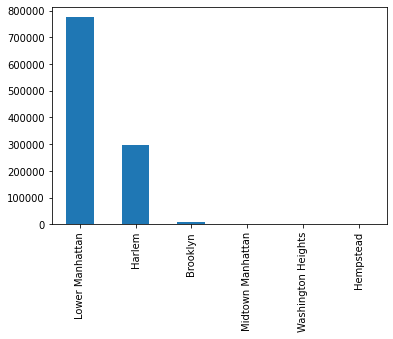

In [71]:
df['neighborhood'].value_counts().plot(kind='bar')

In [18]:
#dealing with imbalanced classes

In [72]:
df['neighborhood'].value_counts()

Lower Manhattan       774519
Harlem                298179
Brooklyn                9462
Midtown Manhattan       2649
Washington Heights      1879
Hempstead                763
Name: neighborhood, dtype: int64

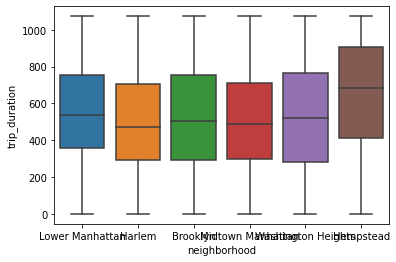

In [73]:
sns.boxplot(data=df, x='neighborhood', y='trip_duration')

In [74]:
#looks promising
dff = df.groupby('neighborhood')['trip_duration'].mean()
dff.head()

neighborhood
Brooklyn             518.406045
Harlem               507.608208
Hempstead            615.344692
Lower Manhattan      559.205010
Midtown Manhattan    513.443564
Name: trip_duration, dtype: float64

In [75]:
dff

neighborhood
Brooklyn              518.406045
Harlem                507.608208
Hempstead             615.344692
Lower Manhattan       559.205010
Midtown Manhattan     513.443564
Washington Heights    525.524215
Name: trip_duration, dtype: float64

In [76]:
#doing ANOVA to determine if significant

dff = dff.to_frame()
dff = dff.reset_index()

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('trip_duration ~ neighborhood', data =dff).fit()

aov_table = sm.stats.anova_lm(model)
aov_table

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/anova.py:140: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df,sum_sq,mean_sq,F,PR(>F)
neighborhood,5.0,8.475938e+03,1695.187635,0.0,NaN
Residual,0.0,3.489668e-25,inf,NaN,NaN


In [77]:
model.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                nan
Time:                        02:02:26   Log-Likelihood:                 165.81
No. Observations:                   6   AIC:                            -319.6
Df Residuals:                       0   BIC:                            -320.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            518.4060        inf          0        nan         nan         nan
neighborhood[T.Harlem]               -10.7978        inf         -0        nan         nan         nan
neighborhood[T.Hempstead]             96.9386        inf          0        nan         nan         nan
neighborhood[T.Lower Manhattan]       40.7990        inf          0        nan         nan         nan
neighborhood[T.Midtown Manhattan]     -4.9625        inf         -0        nan         nan         nan
neighborhood[T.Washington Heights]     7.1182        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.704
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.044
Skew:                           0.000   Prob(JB):                        0.978
Kurtosis:                       2.580   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### same procedure for kmeans_cluster

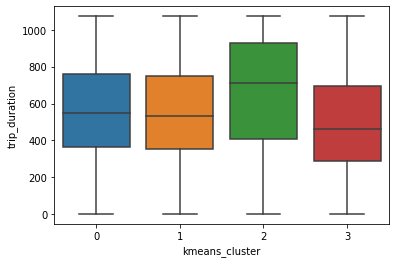

In [78]:
sns.boxplot(data=df, x='kmeans_cluster', y='trip_duration')

In [79]:
df['kmeans_cluster'] = df['kmeans_cluster'].astype(str)

In [80]:
dff2 = df.groupby('kmeans_cluster')['trip_duration'].mean()
dff2.head()

kmeans_cluster
0    564.658655
1    553.002277
2    648.182321
3    500.815296
Name: trip_duration, dtype: float64

In [81]:
dff2 = dff2.to_frame()
dff2 = dff2.reset_index()

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('trip_duration ~ kmeans_cluster', data =dff2).fit()

aov_table = sm.stats.anova_lm(model)
aov_table

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/anova.py:140: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df,sum_sq,mean_sq,F,PR(>F)
kmeans_cluster,3.0,1.117195e+04,3723.984188,0.0,NaN
Residual,0.0,1.292470e-25,inf,NaN,NaN


In [82]:
model.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                nan
Time:                        02:02:40   Log-Likelihood:                 111.71
No. Observations:                   4   AIC:                            -215.4
Df Residuals:                       0   BIC:                            -217.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             564.6587        inf          0        nan         nan         nan
kmeans_cluster[T.1]   -11.6564        inf         -0        nan         nan         nan
kmeans_cluster[T.2]    83.5237        inf          0        nan         nan         nan
kmeans_cluster[T.3]   -63.8434        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.100
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.667
Skew:                           0.000   Prob(JB):                        0.717
Kurtosis:                       1.000   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
#the results yield that the kmeans clustering is not particularly helpful in predicting trip_duration
#R^2 value is low, F statistic is close to zero